# Unsupervised Anomaly Detection on Time Series
## An Overview including Real Life Experiences
By Halil Ertan, Aug 13 [Here](https://towardsdatascience.com/unsupervised-anomaly-detection-on-time-series-9bcee10ab473)

## Overview

1. Probability Based Approaches
    - 1.1 Z-score
    - 1.2 Quartiles-based 
    - 1.3 Elliptic Envelope 
2. Forecasting Based Approaches
    - 2.1 Forecasting model, LSTM and ARIMA
    - 2.2 Prophet 
3. Neural Network Based Approaches
    - 3.1 Autoencoder
    - 3.2 Self Organizing Maps (SOM)
4. Clustering Based Approaches
    - 4.1 k-means
    - 4.2 Gaussian Mixture Model (GMM)
    - 4.3 DBSCAN 
5. Proximity Based Approaches
    - 5.1 k-nearest neighbor(k-NN)
    - 5.2 Local Outlier Factor (LOF)
6. Tree Based Approaches
    - 6.1 Isolation Forest
    - 6.2 Extended Isolation Forest 
7. Dimension Reduction Based Approaches
    - 7.1 Principal Component Analyses (PCA)
8. Real Life Experiences

To understand the normal behaviour of any flow on time axis and detect anomaly situations is one of the prominent fields in data driven studies. These studies are mostly __conducted in unsupervised manner__, `since labelling the data in real life projects is a very tough process in terms of requiring a deep retrospective analyses` if you already don’t have label information. Keep in mind that outlier detection and anomaly detection are used interchangeably most of the time.

There is not a magical silver bullet that performs well in all anomaly detection use cases. In this writing, I touch on fundamental methodologies which are mainly utilized while detecting anomalies on time series in an unsupervised way, and mention about simple working principles of them. In this sense, this writing can be thought as an overview about anomaly detection on time series including real life experiences.

## 1. Probability Based Approaches
### 1.1 Z-score
Using Z-score is one of the most straightforward methodology. Z-score __basically stands for the number of standart deviation that sample value is below or above the mean of the distribution__. It `assumes that each features fits a normal distribution`, and calculating the z-score of each features of a sample give an insight in order to detect anomalies. Samples which have much features whose values are located far from the means are likely to be an anomaly.

While estimating the z-scores, you should take into account the several factors that affect the pattern to get more robust inferences. Let me give you an `example, you aim detecting anomalies in traffic values on devices in telco domain. Hour information, weekday information, device information(if multiple device exist in dataset) are likely to shape the pattern of traffic values. For this reason, z-score should be estimated by considering each device, hour and weekday for this example`. For instance, if you expect 2.5 mbps average traffic on device A at 8 p.m. at weekends, you should take into consideration that value while making a decision for corresponding device and time information.

One of the drawbacks of this approach is that it assumes that features fit a normal distribution which is not true all the time. __Another one can be counted that it ignores the correlations between features in the above mentioned solution__. One important point is that __z-scores can be used as inputs for other anomaly detection models as well__.
### 1.2 Quartiles-based 
[Here](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/)
Solution implements a very similar idea to Z-score, differently it __takes into account `median` instead of `mean` in a simple manner__. Sometimes, it achieves better results compared to the z-score depending on distribution of the data.

### 1.3 Elliptic Envelope 
[sklearn.covariance.EllipticEnvelope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html)

Another option for outlier detection, which __fits multivariate Gaussian distribution on data__. However, it might `not perform well with high dimensional data`.

## 2. Forecasting Based Approaches
### 2.1 Forecasting model, LSTM and ARIMA
In this methodology, a prediction is performed with a forecasting model for the next time period and __if forecasted value is out of confidence interval, the sample is flagged as anomaly__. As a forecasting model, LSTM and ARIMA models can be used. The advantage of these methods are that they are well-performing models on time series and can be applied directly on time series without feature engineering step most of the time. On the other hand, estimating the confidence interval is not a trivial and easy task. Furthermore, the accuracy of the forecasting model directly affects the success of anomaly detection. __Good news is that you are able to evaluate the accuracy of the forecasting model in a supervised manner, even if you are performing anomaly detection without any label info__.

### 2.2 Prophet
It is basically a forecasting algorithm designed for time series and developed by Facebook, but I encounter many implementation of this algortihm in anomaly detection use cases.

## 3. Neural Network Based Approaches
### 3.1 Autoencoder
An unsupervised type neural networks, and __mainly used for feature extraction and dimension reduction__. At the same time, it is a good option for anomaly detection problems. Autoencoder consists of encoding and decoding parts. In encoding part, main features are extracted which represents the patterns in the data, and then each samples is reconstructed in the decoding part. The reconstruction error will be minumum for normal samples. On the other hand, the model is __not able to reconstruct a sample that behaves abnormal, resulting a high reconstruction error. So, basically, the higher reconstruction error a sample has, the more likely it is to be an anomaly__.

Autoencoder is very convenient for time series, so it can also be considered among preferential alternatives for anomaly detection on time series. Note that, __layers of autoencoders can be composed of LSTMs at the same time. Thus, dependencies in sequential data just like in time series can be captured__.

### 3.2 Self Organizing Maps (SOM)
Also another unsupervised neural network based implementation, and it has simpler working principle compared to other neural network models. Although, __it does not have a widespread usage in anomaly detection use cases, it is good to keep in mind that it is also an alternative__.

## 4. Clustering Based Approaches

### 4.1 k-means
The idea behind usage of __clustering in anomaly detection is that outliers don’t belong to any cluster or has their own clusters__. k-means is one of the most known clustering algorithms and easy to implement. However, `it brings some limitations like picking an appropriate k value`. Moreover, it `forms spherical clusters which is not correct for all cases`. Another drawback is that `it is not able to supply a probability while assigning samples to clusters especially considering that clusters can overlap in some situations`.

### 4.2 Gaussian Mixture Model (GMM)
Focus on the abovementioned weaknesses of k-means and present a probabilistic approach. It __attemps to find a mixture of a finite number of Gaussian distributions inside the dataset__.

### 4.3 DBSCAN 
__Density based clustering algorithm__. It determines the core points in the dataset which contains at least min_samples around it within epsilon distance, and creates clusters from these samples. After that, it finds all points which are densely reachable(within epsilon distance) from any sample in the cluster and add them to the cluster. And then, iteratively, it performs the same procedure for the newly added samples and extend the cluster. DBSCAN determines the cluster number by itself, and __outliers samples will be assigned as -1__. In other words, it directly serves for anomaly detection. Note that, it might suffer from perfromance issues with large sized datasets.

## 5. Proximity Based Approaches
### 5.1 k-nearest neighbor(k-NN)
The first algorithm that come to mind is k-nearest neighbor(k-NN) algorithm. The __simple logic behind is that outliers are far away from the rest of samples in the data plane__. The `distances to nearest negihbors of all samples are estimated and the samples located far from the other samples can be flagged as outlier`. k-NN can use different __distance metrics__ like `Eucledian`, `Manhattan`, `Minkowski`, `Hamming` distance etc.

### 5.2 Local Outlier Factor (LOF)
Another alternative algorithm is Local Outlier Factor (LOF) which __`identifies the local outliers` with respect to local neighbors rather than global data distribution__. It utilizes a metric named as __local reachability density(LRD)__ in order to represents density level of each points. LOF of a sample is simply the ratio of average LRD values of the sample’s neighbours to LRD value of the sample itself. __If the density of a point is much smaller than average density of its neighbors, then it is likely to be an anomaly__.

## 6. Tree Based Approaches
### 6.1 Isolation Forest
Tree based, very effective algorithm for detecting anomalies. It builds multiple trees. To build a tree, it randomly picks a feature and a split value within the minimums and maximums values of the corresponding feature. This procedure is applied to all samples in the dataset. And finally, a tree ensemble is composed by averaging all trees in the forest.
The idea behind the Isolation Forest is that outliers are easy to diverge from rest of the samples in dataset. For this reason, we __expect shorter paths from root to a leaf node in a tree(the number of splittings required to isolate the sample) for abnormal samples compared to rest of the samples in dataset__.
### 6.2 Extended Isolation Forest 
Comes with an imporvement to splitting process of Isolation Forest. __In Isolation Forest__, splitting is performed parallel to the axes, in other saying, in horizontal or vertical manner resulting too much redundant regions in the domain, and similarly over construction of many trees. __Extended Isolation Forest__ remedies these shortcomings by allowing splitting process to happen in every direction, instead of selecting a random feature with a random splitting value, it selects a random normal vector along with a random intercept point.

## 7. Dimension Reduction Based Approaches
### 7.1 Principal Component Analyses (PCA)
Is mainly used as a dimension reduction method for high dimensional data. In a basic manner, it helps to cover most of the variance in data with a smaller dimension by extracting eigenvectors that have largest eigenvalues. Therefore, it is able to keep most of the information in the data with a very smaller dimension.

While using PCA in anomaly detection, it follows a very similar approach like Autoencoders. `Firstly, it decomposes data into a smaller dimension and then it reconstructs data from the decomposed version of data again. Abnormal samples tend to have a high reconstruction error regarding that they have different behaviors from other observations in data, so it is diffucult to obtain same observation from the decomposed version`. PCA can be a __good option for multivariate anomaly detection scenarios__.

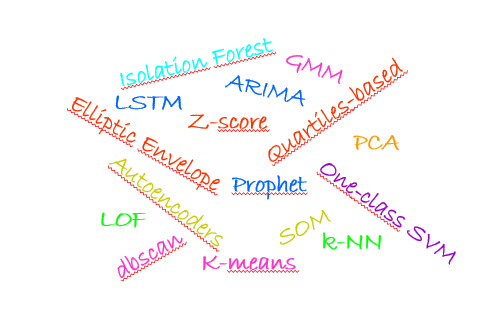

## 8. Real Life Experiences
>- __Before starting the study, answer the following questions: How much data do you have retroactively? Univariate or multivariate data? What is the frequency of making anomaly detection?(near real time, hourly, weekly?) On what unit you are supposed to make anomaly detection? (For instance, you are studying on traffic values and you might make an anomaly detection on only devices or for each slot/port of devices)__

- __Do your data have multiple items?__ Let me clarify it, assume that you are supposed to perform anomaly detection on traffic values of devices from the previous example in telco domain. You probably have traffic values for many devices(may be __thousands of different devices), each has different patterns, and you should avoid to design separate models for each device__ in terms of complexity and maintenance issues in production. `In such situations, selecting correct features is more functional rather than focusing on trying different models`. Determine the patterns of each device considering properties like hour, weekday/weekend info, and extract deviation from their patterns (like z-scores) and feed the models with these features. Note that contextual anomalies are tackled mostly in time series. So, you can handle this problem with only one model that is really precious. __From the forecasting perspective, a multi head neural network based model can be adapted as an advanced solution__.
- Before starting, if it is possible, you necessarily __ask for a few anomaly example from the past from the client__. It will give you an insight about what is expected from you.
- The number of anomalies is another concern. `Most anomaly detection algorithms have a scoring process internally, so you are able to tune the number of anomalies by selecting` an __optimum threshold__. Most of the time, clients dont want to be disturbed with too many anomalies even if they are real anomalies. Therefore, you might need a separate false positive elimination module. For simplicity, if a device has traffic pattern of 10mbps and if it increases to 30mbps at a point, then it is absolutely an anomaly. However, it might not attract more attention than increasing from 1gbps to 1.3gbps.
- Before making any decision about methodologies, I recommend visualizing the data for at least a sub-sample that will give a deep vision about data.
- While some of the methods accept the time series directly without any preprocessing step, you need to implement a preprocessing or feature extraction step in order to turn data into convenient format for some methods.
- Note that novelty detection and anomaly detection are different concepts. In short, in __novelty detection__, you have a dataset completely consists of normal observations, and decide on whether new received observation fits to data in trainset. At variance with novelty detection, you have trainset consists of both normal and abnormal samples in anomaly detection. [One-class SVM](https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c) might be a good option for novelty detection problems.
- I encourage to take a look on [pyod](https://pyod.readthedocs.io/en/latest/) and [pycaret](https://pycaret.org/anomaly-detection/) libraries in python, which provide off-the-shelf solutions in anomaly detection.